## Pandas Visualizations and Grid Charts
Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009 — from Monday to Friday. 

Each row describes the following:
The time of registering the data: the `Hour (Coded)` column.
The number of incidents that happened in São Paulo at the time of registering the data: `Immobilized bus`, `Broken Truck`, `Vehicle excess`, `Fire vehicles`, etc.
The traffic slowness at the time of registering the data: `Slowness in traffic (%)`.
The data was registered from 7:00 to 20:00 every 30 minutes. The `Hour (Coded)` column has values from `1` to `27`:

- `1` corresponds to 7:00.
- `2` corresponds to 7:30.
- ...
- `26` corresponds to 19:30.
- `27` corresponds to 20:00.
Researchers Ricardo Pinto Ferreira, Andréa Martiniano, and Renato Jose Sassi collected the dataset. You can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil).

### 2. Traffic Behavior Dataset
Perform a quick examination of the dataset.
- Inspect the first and the last five rows.
- Use `DataFrame.info()` to print summary information about the dataset.  
- Do you see any missing values? Are all data types numerical?  
   - No null value   
   - Slowness in traffic (%) is string(object)

In [2]:
import pandas as pd
traffic=pd.read_csv(r'./traffic_sao_paulo.csv',sep=';')
traffic.info()
# No null value, Slowness in traffic (%) is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

### 3. Slowness in Traffic
1. Import `matplotlib.pyplot`, and plot a histogram for the `Slowness in traffic (%)` column — run your code without submitting the answer.
2. Based on the histogram, evaluate the truth value of the sentences below.
- The distribution of `Slowness in traffic (%)` is right skewed. Assign the Boolean `True` or `False` to `sentence_1`.
- Most of the values pile up on the left side of the histogram. Assign `True` or `False` to `sentence_2`.
- Most of the values are over 15.0%. Assign `True` or `False` to `sentence_3`.

In [3]:
traffic['Slowness in traffic (%)'].head()
# It's a string represent pecentage and seperate by ','
# We need to convert it to numerical for futher operation

0     4,1
1     6,6
2     8,7
3     9,2
4    11,1
Name: Slowness in traffic (%), dtype: object

In [4]:
traffic['Slowness in traffic (%)']=traffic['Slowness in traffic (%)'].str.replace(',','.')
traffic['Slowness in traffic (%)']=traffic['Slowness in traffic (%)'].astype(float)
traffic['Slowness in traffic (%)'].head()

0     4.1
1     6.6
2     8.7
3     9.2
4    11.1
Name: Slowness in traffic (%), dtype: float64

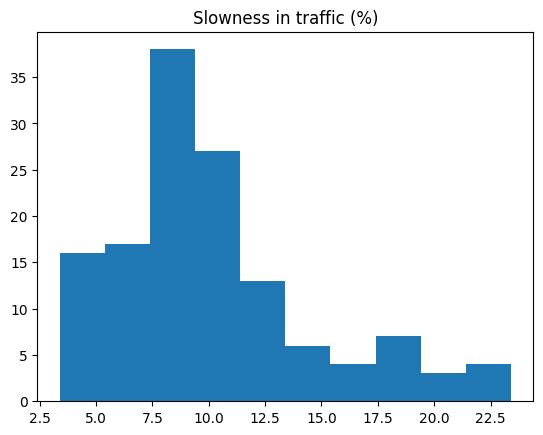

In [5]:
import matplotlib.pyplot as plt
plt.hist(traffic['Slowness in traffic (%)'])
plt.title('Slowness in traffic (%)')
plt.show()

In [6]:
# The distribution of `Slowness in traffic (%)` is right skewed.
sentence_1=True

# Most of the values pile up on the left side of the histogram. 
sentence_2=True

# Most of the values are over 15.0%.
sentence_3=False

### 4. Pandas Visualization Methods
1. Use the `Series.plot.hist()` method to generate a histogram for the `Slowness in traffic (%)` column.
2. Add the title Distribution of `Slowness in traffic (%)` (the answer checking is case-sensitive).
3. Add the x-label `Slowness in traffic (%)`.
4. Display the plot using `plt.show()`.

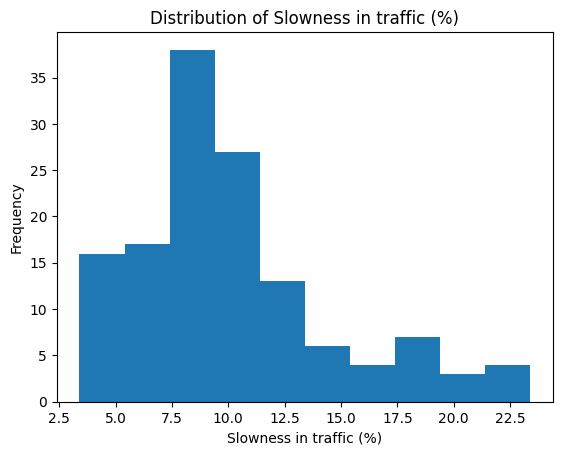

In [7]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

### 5. Frequency of Incidents
1. Generate a horizontal bar plot for the `incidents.sum()` table. Run your code without submitting the answer.
2. Based on the resulting bar plot, evaluate the truth value of the following sentences:
- Broken trucks are the most frequent cause of slow traffic. Assign the Boolean `True` or `False` to `sentence_1`.
- Lack of electricity and flooding are less frequent than broken trucks. Assign `True` or `False` to `sentence_2`.
- The most frequent incident type is broken trucks. Assign `True` or `False` to `sentence_3`

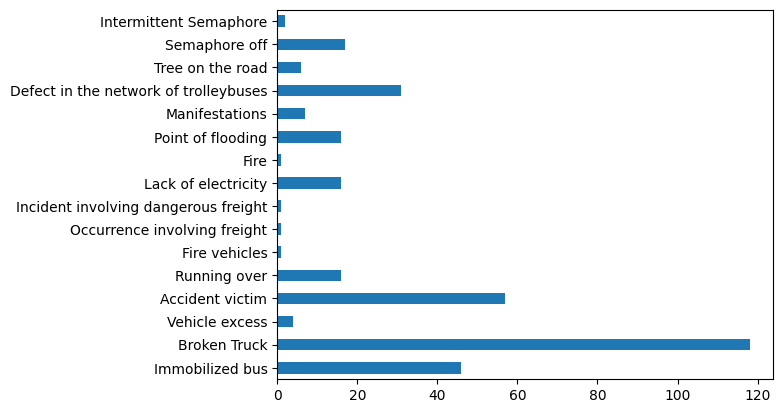

In [8]:
incidents=traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],axis=1) # axis refer to drop column
incidents.sum().plot.barh() # barh() is bar chart in horizontal
plt.show()
sentence_1=False
sentence_2=True
sentence_3=True

### 6. Correlations with Traffic Slowness
Using the `DataFrame.plot.scatter()` method:

1. Generate a scatter plot with `Slowness in traffic (%)` on the x-axis and `Point of flooding` on the y-axis. Close and display the plot using `plt.show()`.
2. Generate a scatter plot with `Slowness in traffic (%)` on the x-axis and `Semaphore off` on the y-axis.


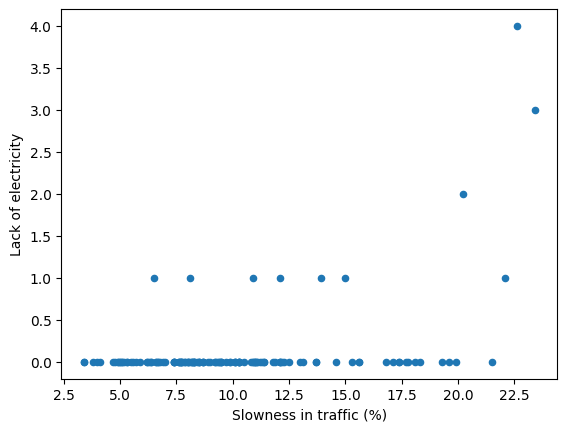

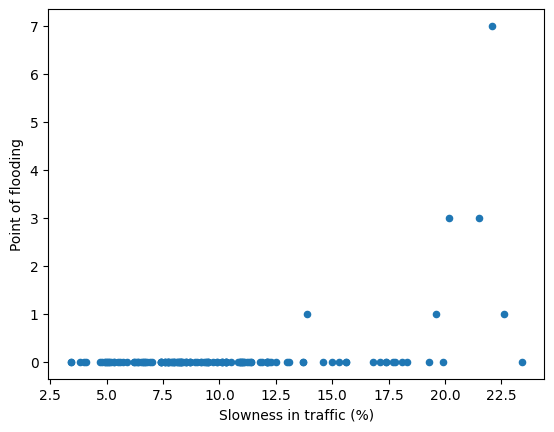

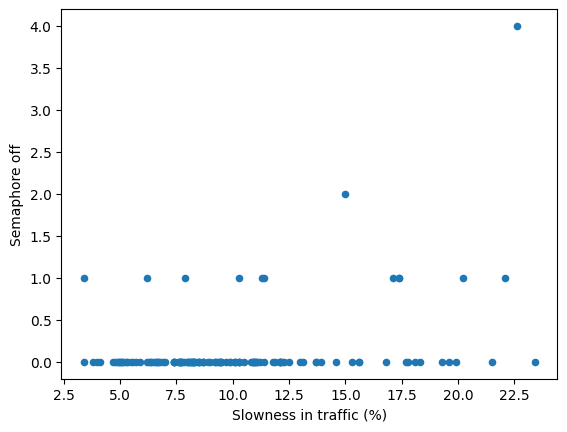

In [9]:
traffic.plot.scatter(x='Slowness in traffic (%)',y='Lack of electricity')
traffic.plot.scatter(x='Slowness in traffic (%)',y='Point of flooding')
traffic.plot.scatter(x='Slowness in traffic (%)',y='Semaphore off')
plt.show()

### 7. Traffic Slowness Over 20%

1. Isolate all the rows where traffic slowness is 20% or more. Assign the new `DataFrame` to a variable named `slowness_20_or_more`.
2. Drop the `Slowness in traffic (%)` and `Hour (Coded)` columns from `slowness_20_or_more`.
3. Calculate the event frequencies using the `DataFrame.sum()` method on `slowness_20_or_more`. Assign the resulting `Series` to `incident_frequencies`.
4. Use `incident_frequencies` to plot a horizontal bar plot — use a Pandas method.
5. Examine the plot — what are some high-frequency incidents when traffic slowness is 20% or more?

<AxesSubplot:>

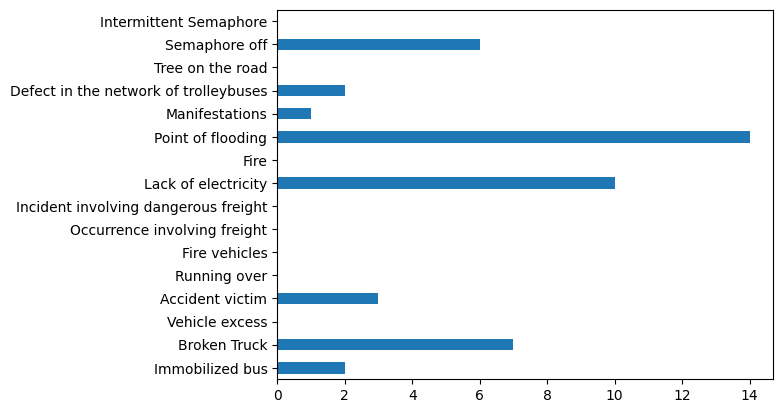

In [10]:
slowness_20_or_more=traffic[traffic['Slowness in traffic (%)']>=20].drop(['Slowness in traffic (%)','Hour (Coded)'],axis=1)
incident_frequencies=slowness_20_or_more.sum()
incident_frequencies.plot.barh()
# high-frequency incidents with traffic slowness higher than 20% are 'point of flooding', 'Semaphore off' and 'lack of electricity'

### 8. How Traffic Slowness Change

1. Create a separate line plot for each day by using a `for` loop. Iterate over the `days` list, and for each day, do the following:
   - Plot a line plot using the `DataFrame.plot.line()` method — `Hour (Coded)` must be on the x-axis and `Slowness in traffic (%)` on the y-axis.
   - Add a title to the plot using the name of the day.
   - Use `plt.ylim([0, 25])` to make the range of the y-axis the same for all plots — this helps with comparison.
   Close and display each plot with `plt.show()`.

2. Inspect and compare the graphs — do you notice any recurring pattern in how traffic slowness changes during the day?

In [11]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
# 7:00~20:00 refer to 26 blocks per 30min
for i, day in zip(range(0, 135, 27), days):
    # moving window every 27 rows, aggreate 27 rows into one day into each_day_traffic
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

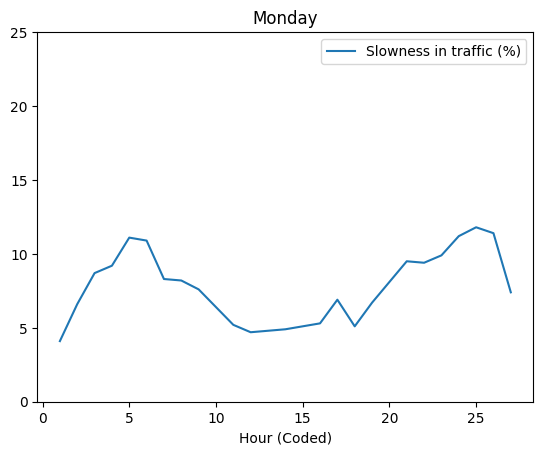

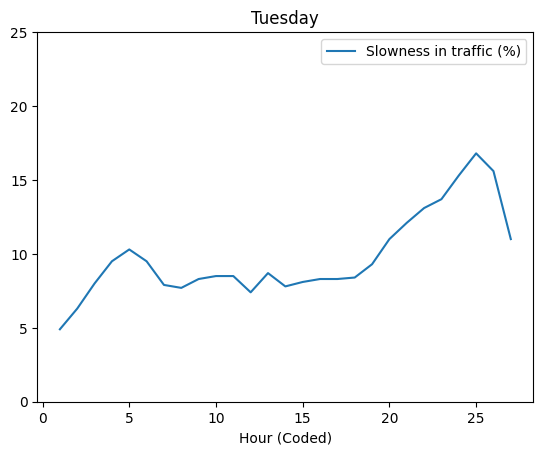

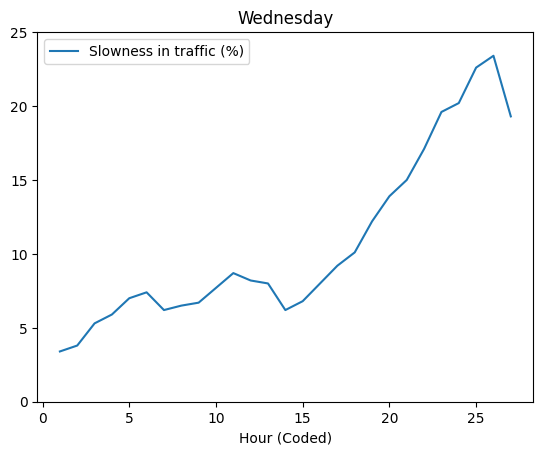

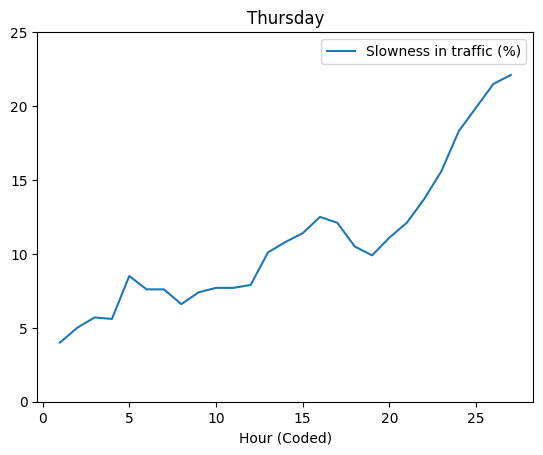

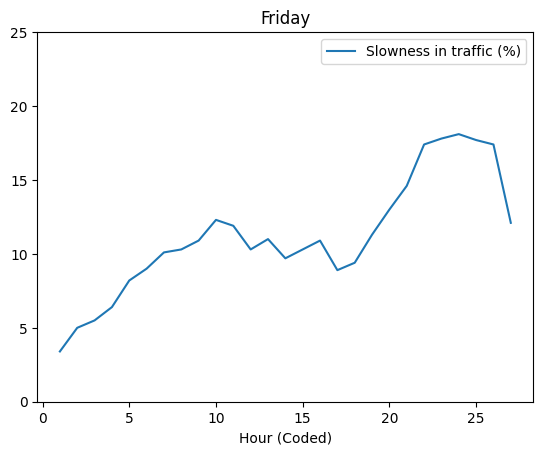

In [12]:
for day in days:
    traffic_per_day[day].plot.line(x='Hour (Coded)',y='Slowness in traffic (%)')
    plt.title(day)
    plt.ylim([0, 25])
    plt.show()

### 9. Comparing Graphs
1. Generate all the five line plots on a single graph. Use a `for` loop over the `days` list, and for each day, do the following:
   - Plot a line plot using `plt.plot()`: `Hour (Coded)` must be on the x-axis and `Slowness in traffic (%)` on the y-axis.

2. Add a legend to the graph.
   - Outside the for loop, use `plt.legend()`.
   - Inside the `for` loop, use the `label` parameter inside `plt.plot()` — the `` should be the day name.

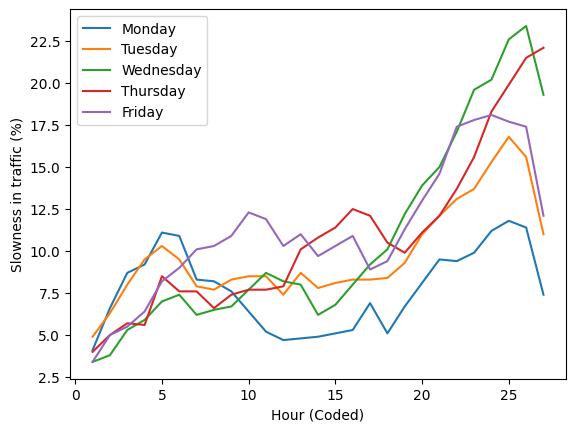

In [13]:
for day in days:
    traffic_day=traffic_per_day[day]
    plt.plot(traffic_day['Hour (Coded)'], traffic_day['Slowness in traffic (%)'], label=day)

plt.xlabel('Hour (Coded)')
plt.ylabel('Slowness in traffic (%)')
plt.legend()
plt.show()

### 10. Grid Charts
- To create a grid chart, we start by creating the larger figure where we will plot all the graphs — we use the `plt.figure()` function.
- We can specify the number of rows and columns for our grid chart by using the `plt.subplot(nrows, ncols, index)` function. For instance, `plt.subplot(3, 2, 1)` means that we want to build the plot with index 1 on a grid chart that has 3 rows and 2 columns.


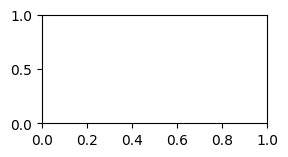

In [15]:
plt.figure() 
plt.subplot(3, 2, 1)
plt.show()

### 11. Grid Charts (II)
1. Create a new figure with `figsize=(10,12)`.
2. Create the first five plots using a `for` loop. Use the `zip()` function to iterate over both a range (use the `range()` function) and the `days` list. For each iteration, do the following:
- Add the proper index number inside `plt.subplot(nrows, ncols, index)`.
- Generate a line plot for each day — `Hour (Coded)` must be on the x-axis and `Slowness in traffic (%)` on the y-axis.
- Add the day name as a plot title.
- Bring the plot to a 0-25 range on the y-axis.

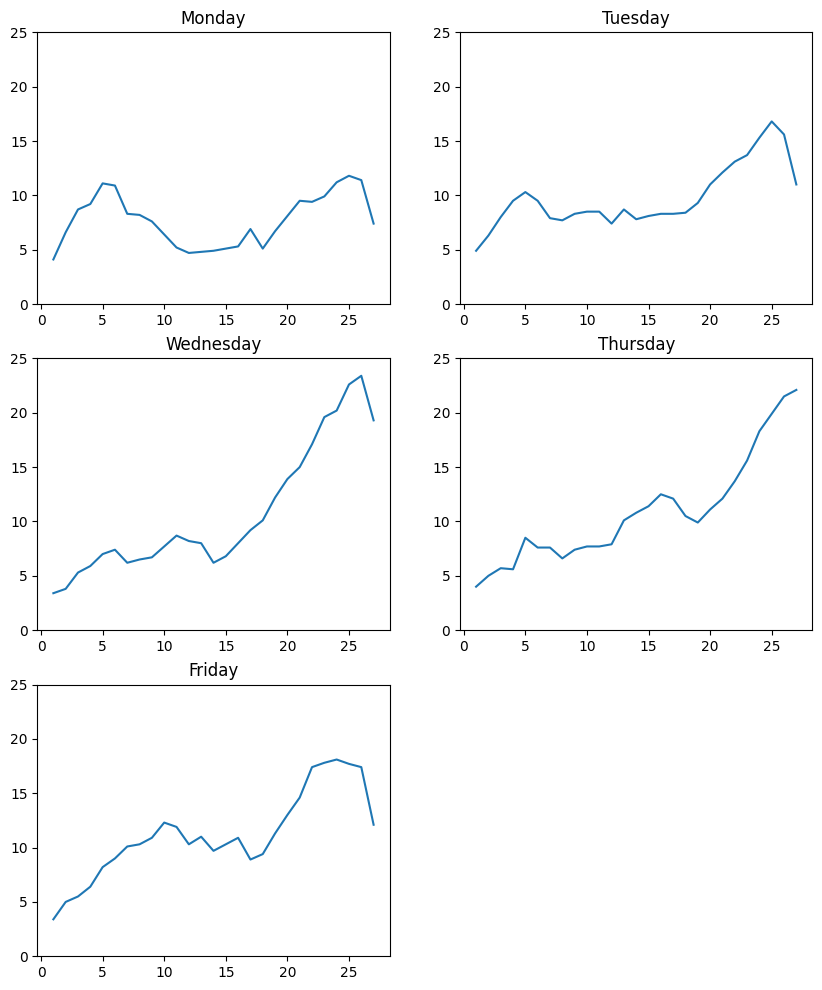

In [16]:
plt.figure(figsize=(10, 12))
for i,day in zip(range(1,6),days):
    traffic_day=traffic_per_day[day]
    plt.subplot(3,2,i)
    plt.plot(traffic_day['Hour (Coded)'],traffic_day['Slowness in traffic (%)'],label=day)
    plt.title(day)
    plt.ylim([0,25])

plt.show()

### 12. Grid Charts (III)
1. Add a new subplot with index number `6`.
2. Generate the line plot showing all the days on a single graph, and add a legend to the graph.
3. Bring the y-range to `[0, 25]`.

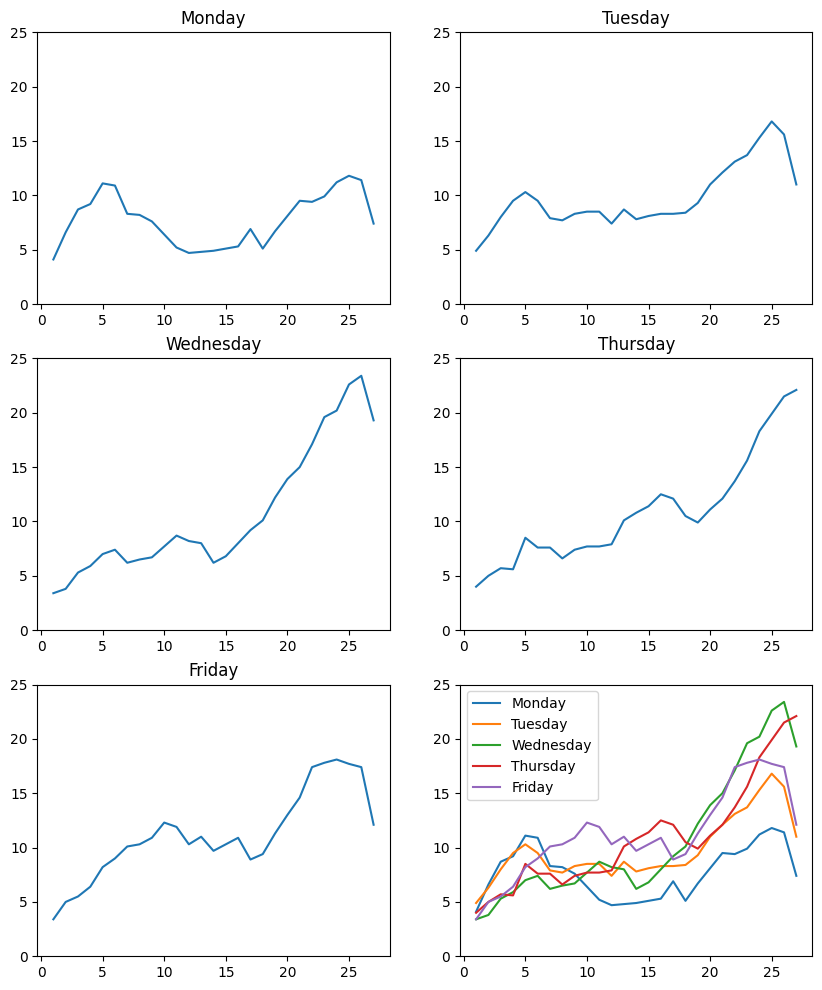

In [17]:
plt.figure(figsize=(10, 12))
for i,day in zip(range(1,6),days):
    traffic_day=traffic_per_day[day]
    plt.subplot(3,2,i)
    plt.plot(traffic_day['Hour (Coded)'],traffic_day['Slowness in traffic (%)'],label=day)
    plt.title(day)
    plt.ylim([0,25])
    
plt.subplot(3, 2, 6) 

for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
        label=day)
    plt.ylim([0,25])
    
plt.legend()
plt.show()